# Proyecto I : Dato inicial para un objeto compacto
## Formulación en coord cilindricas
### Estudio de convergencia
En este notebook tomare 5 refinamientos de la grilla triangular (sin refinamiento en ningun punto en particular) del dominio $[0,1e^6]x[0,1e^6]$, dominio del problema resuelto en el notebook "Proyecto1Cilindricas-NS.ipynb". Estudiaré la convergencia a la solucion de la ecuaciones al refinar las mesh.

In [1]:
Atom = false
#Atom = true

false

In [2]:
using Gridap
using GridapODEs
if  Atom == false
    using GridapMakie, GLMakie
end
using FileIO
using GridapGmsh
using gmsh
using Gridap.CellData
using Gridap.Visualization
using Gridap.Arrays

In [3]:
Threads.nthreads()

7

In [4]:
model1 = GmshDiscreteModel("modelos/11.msh")
model2 = GmshDiscreteModel("modelos/12.msh")
model3 = GmshDiscreteModel("modelos/13.msh")
model4 = GmshDiscreteModel("modelos/14.msh")
model5 = GmshDiscreteModel("modelos/15.msh")
model6 = GmshDiscreteModel("modelos/16.msh")

Info    : Reading 'modelos/11.msh'...
Info    : 9 entities
Info    : 144 nodes
Info    : 286 elements
Info    : Done reading 'modelos/11.msh'
Info    : Reading 'modelos/12.msh'...
Info    : 9 entities
Info    : 512 nodes
Info    : 1022 elements
Info    : Done reading 'modelos/12.msh'
Info    : Reading 'modelos/13.msh'...
Info    : 9 entities
Info    : 1931 nodes
Info    : 3860 elements
Info    : Done reading 'modelos/13.msh'
Info    : Reading 'modelos/14.msh'...
Info    : 9 entities
Info    : 7576 nodes
Info    : 15150 elements
Info    : Done reading 'modelos/14.msh'
Info    : Reading 'modelos/15.msh'...
Info    : 9 entities
Info    : 29990 nodes
Info    : 59978 elements
Info    : Done reading 'modelos/15.msh'
Info    : Reading 'modelos/16.msh'...
Info    : 9 entities
Info    : 119136 nodes
Info    : 238270 elements                                               
Info    : Done reading 'modelos/16.msh'                                    


UnstructuredDiscreteModel()

In [5]:
Ω1 = Triangulation(model1)
degree = 3
dΩ1 = Measure(Ω1,degree)

Ω2 = Triangulation(model2)
dΩ2 = Measure(Ω2,degree)

Ω3 = Triangulation(model3)
dΩ3 = Measure(Ω3,degree)

Ω4 = Triangulation(model4)
dΩ4 = Measure(Ω4,degree)

Ω5 = Triangulation(model5)
dΩ5 = Measure(Ω5,degree)

Ω6 = Triangulation(model6)
dΩ6 = Measure(Ω6,degree)

Measure()

In [6]:
writevtk(Ω1,"square")
writevtk(Ω2,"square")
writevtk(Ω3,"square")
writevtk(Ω4,"square")
writevtk(Ω5,"square")
writevtk(Ω6,"square")

(["square.vtu"],)

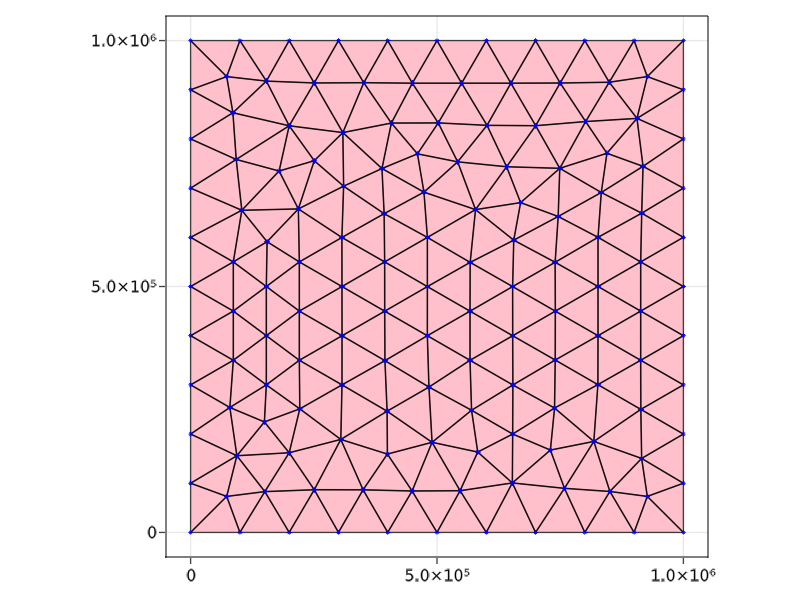

In [7]:
if Atom == false 
    fig, ax = plot(Ω1)
    ax.aspect = AxisAspect(1) # this makes the region with fixed aspect, so it might not give the correct ratios
    wireframe!(Ω1, color=:black, linewidth=1)
    scatter!(Ω1, marker=:star8, markersize=4, color=:blue)
    fig
end 

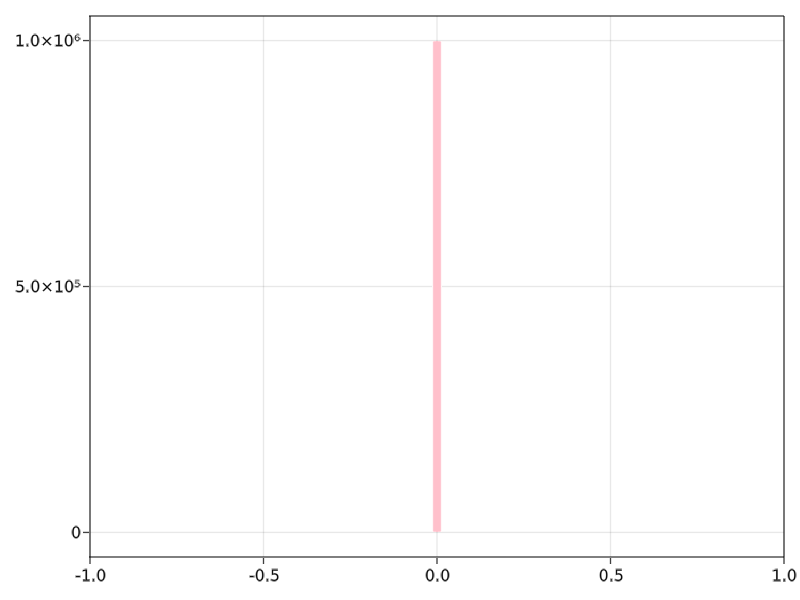

In [8]:
neumanntags_crho= ["centrorho"]

Γ_crho1 = BoundaryTriangulation(model1,tags=neumanntags_crho)
dΓ_crho1 = Measure(Γ_crho1,degree)

Γ_crho2 = BoundaryTriangulation(model2,tags=neumanntags_crho)
dΓ_crho2 = Measure(Γ_crho2,degree)

Γ_crho3 = BoundaryTriangulation(model3,tags=neumanntags_crho)
dΓ_crho3 = Measure(Γ_crho3,degree)

Γ_crho4 = BoundaryTriangulation(model4,tags=neumanntags_crho)
dΓ_crho4 = Measure(Γ_crho4,degree)

Γ_crho5 = BoundaryTriangulation(model5,tags=neumanntags_crho)
dΓ_crho5 = Measure(Γ_crho5,degree)

Γ_crho6 = BoundaryTriangulation(model6,tags=neumanntags_crho)
dΓ_crho6 = Measure(Γ_crho6,degree)

if Atom == false 
    fig = plot(Γ_crho1, linewidth=8
    #, shading=true
    )
end

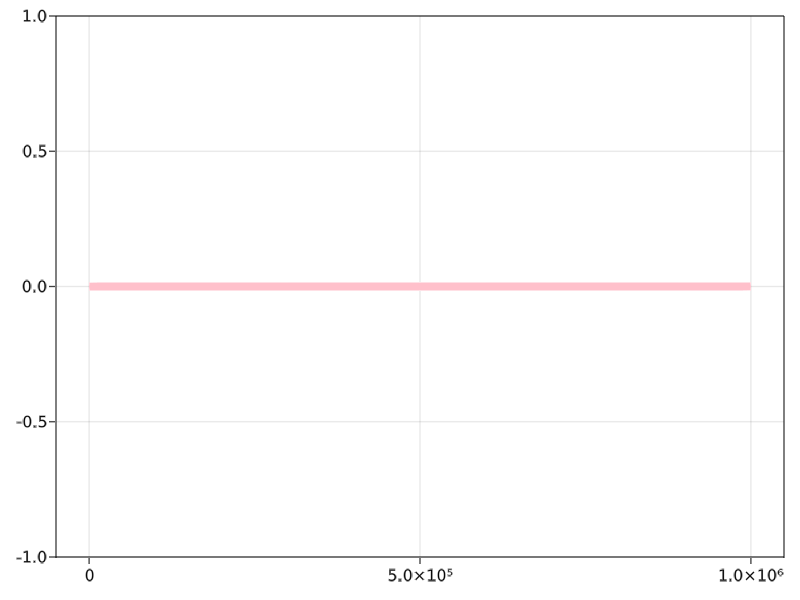

In [9]:
neumanntags_cz= [ "centroz"]

Γ_cz1 = BoundaryTriangulation(model1,tags=neumanntags_cz)
dΓ_cz1= Measure(Γ_cz1,degree)

Γ_cz2 = BoundaryTriangulation(model2,tags=neumanntags_cz)
dΓ_cz2= Measure(Γ_cz2,degree)

Γ_cz3 = BoundaryTriangulation(model3,tags=neumanntags_cz)
dΓ_cz3= Measure(Γ_cz3,degree)

Γ_cz4 = BoundaryTriangulation(model4,tags=neumanntags_cz)
dΓ_cz4= Measure(Γ_cz4,degree)

Γ_cz5 = BoundaryTriangulation(model5,tags=neumanntags_cz)
dΓ_cz5= Measure(Γ_cz5,degree)

Γ_cz6 = BoundaryTriangulation(model6,tags=neumanntags_cz)
dΓ_cz6= Measure(Γ_cz6,degree)

if Atom == false 
    fig = plot(Γ_cz1, linewidth=8
    #, shading=true
      )
end

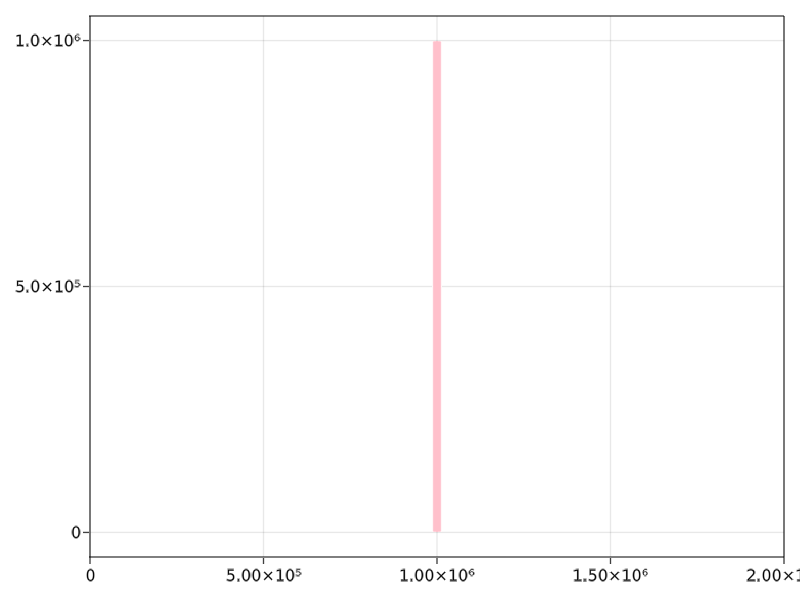

In [10]:
neumanntags_extrho = [ "asintrho"]

Γ_extrho1 = BoundaryTriangulation(model1,tags=neumanntags_extrho)
dΓ_extrho1 = Measure(Γ_extrho1,degree)

Γ_extrho2 = BoundaryTriangulation(model2,tags=neumanntags_extrho)
dΓ_extrho2 = Measure(Γ_extrho2,degree)

Γ_extrho3 = BoundaryTriangulation(model3,tags=neumanntags_extrho)
dΓ_extrho3 = Measure(Γ_extrho3,degree)

Γ_extrho4 = BoundaryTriangulation(model4,tags=neumanntags_extrho)
dΓ_extrho4 = Measure(Γ_extrho4,degree)

Γ_extrho5 = BoundaryTriangulation(model5,tags=neumanntags_extrho)
dΓ_extrho5 = Measure(Γ_extrho5,degree)

Γ_extrho6 = BoundaryTriangulation(model6,tags=neumanntags_extrho)
dΓ_extrho6 = Measure(Γ_extrho6,degree)

if Atom == false 
    fig = plot(Γ_extrho1, linewidth=8
    #, shading=true
   )
end    

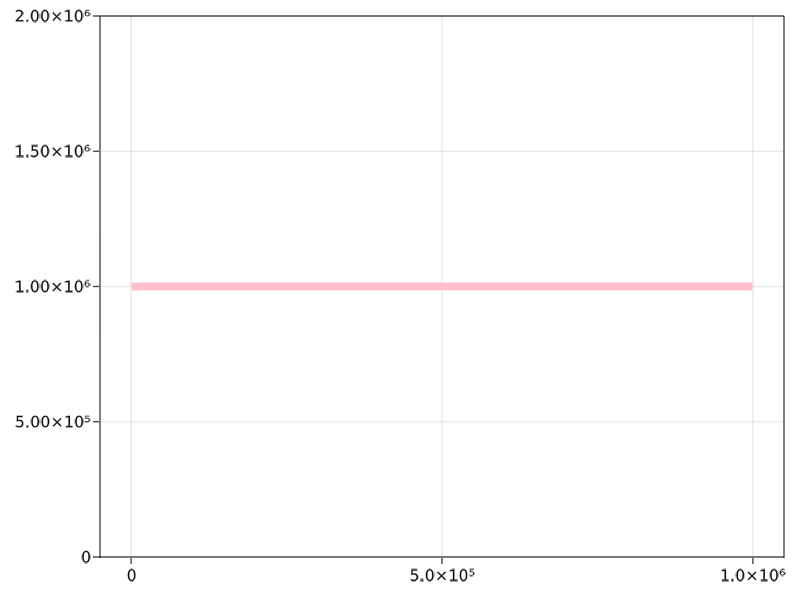

In [11]:
neumanntags_extz = [  "asintz" ]

Γ_extz1 = BoundaryTriangulation(model1,tags=neumanntags_extz)
dΓ_extz1 = Measure(Γ_extz1,degree)

Γ_extz2 = BoundaryTriangulation(model2,tags=neumanntags_extz)
dΓ_extz2 = Measure(Γ_extz2,degree)

Γ_extz3 = BoundaryTriangulation(model3,tags=neumanntags_extz)
dΓ_extz3 = Measure(Γ_extz3,degree)

Γ_extz4 = BoundaryTriangulation(model4,tags=neumanntags_extz)
dΓ_extz4 = Measure(Γ_extz4,degree)

Γ_extz5 = BoundaryTriangulation(model5,tags=neumanntags_extz)
dΓ_extz5 = Measure(Γ_extz5,degree)

Γ_extz6 = BoundaryTriangulation(model6,tags=neumanntags_extz)
dΓ_extz6 = Measure(Γ_extz6,degree)

if Atom == false 
    fig = plot(Γ_extz1, linewidth=8
    #, shading=true
   )
end   

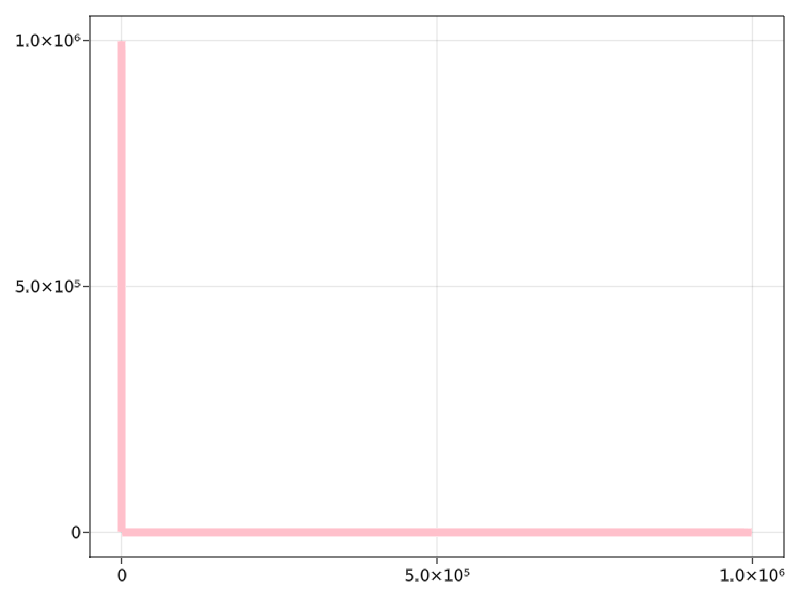

In [12]:
neumanntags_centro = [ "centroz", "centrorho"]

Γ_centro1 = BoundaryTriangulation(model1,tags=neumanntags_centro)
dΓ_centro1 = Measure(Γ_centro1,degree)

Γ_centro2 = BoundaryTriangulation(model2,tags=neumanntags_centro)
dΓ_centro2 = Measure(Γ_centro2,degree)

Γ_centro3 = BoundaryTriangulation(model3,tags=neumanntags_centro)
dΓ_centro3 = Measure(Γ_centro3,degree)

Γ_centro4 = BoundaryTriangulation(model4,tags=neumanntags_centro)
dΓ_centro4 = Measure(Γ_centro4,degree)

Γ_centro5 = BoundaryTriangulation(model5,tags=neumanntags_centro)
dΓ_centro5 = Measure(Γ_centro5,degree)

Γ_centro6 = BoundaryTriangulation(model6,tags=neumanntags_centro)
dΓ_centro6 = Measure(Γ_centro6,degree)

if Atom == false 
    fig = plot(Γ_centro1, linewidth=8
    #, shading=true
    )
end

In [13]:
order = 2
reffe = ReferenceFE(lagrangian,Float64,order)

V1 = TestFESpace(model1,reffe,conformity=:H1)
U1 = TrialFESpace(V1)

V2 = TestFESpace(model2,reffe,conformity=:H1)
U2 = TrialFESpace(V2)

V3 = TestFESpace(model3,reffe,conformity=:H1)
U3 = TrialFESpace(V3)

V4 = TestFESpace(model4,reffe,conformity=:H1)
U4 = TrialFESpace(V4)

V5 = TestFESpace(model5,reffe,conformity=:H1)
U5 = TrialFESpace(V5)

V6 = TestFESpace(model6,reffe,conformity=:H1)
U6 = TrialFESpace(V6)

UnconstrainedFESpace()

In [14]:
SB= true
# true Spherical objet
# false  Concave objet

true

In [15]:
# fuente, a tiene la info del objeto 
a0=6.0E-18

#Shperical Body
R=7.5E5
Z=7.3E5

#Concave body
B=5.0E5
D= 0.3

function s(x)
    if SB == true
        return sqrt((x[1]/ R)^2 + (x[2]/Z)^2) 
        end
    if !SB == true
       return  sqrt((x[1])^2 + (x[2])^2 ) /( B *(D + (x[1]^2 /(x[1]^2 +x[2]^2 +0.00000001)) )  ) #((x[1])^2 + (x[2])^2 )^(3/2) /( B *(D* x[2]^2 +(D+1.)*x[1]^2 )  )
       end
end

q(x)=1. - s(x) ^4 * (1. - 5. *(s(x) -1.) + 15. * (s(x)-1.)^2 - 35. *(s(x) -1.)^3 +70. * (s(x)- 1.)^4)

function α(x)
  if s(x)  < 1.
        return q(x)*a0
        end
    if s(x) >= 1.
       return  0.
    end
end
t(x) = 8*π*α(x)

#Cond de Newman borde centro
c(x)=0.


c (generic function with 1 method)

In [16]:
if SB == true
     writevtk(Ω5,"resultados/Proyecto1/NS/α_spherical_4",cellfields=["α"=>α])
end
if !SB == true
      writevtk(Ω5,"resultados/Proyecto1/NS/α_concave_4",cellfields=["α"=>α])
end

In [17]:
d(x) = VectorValue(2. ,0)
conv(l,∇t) = (∇t')⋅l

conv (generic function with 1 method)

In [18]:
ρ(x)=x[1]
ρvec(x) = VectorValue(1.,0)
zvec(x) = VectorValue(0,1.)
z(x)=x[2]

z (generic function with 1 method)

In [19]:
a1(u,v) = ∫( (d  ⋅ ∇(u))*v - ∇(v) ⋅ ∇(u)*ρ  ) *dΩ1 + ∫( -v *( u +(zvec ⋅ ∇(u))*z) ) *dΓ_extrho1 +   ∫(- v *(u * ρ/z +(ρvec ⋅ ∇(u))*ρ*ρ/z) ) *dΓ_extz1  
b1(v) = ∫(-v * t* ρ) *dΩ1 + ∫( c * v *ρ ) *dΓ_centro1

a2(u,v) = ∫( (d  ⋅ ∇(u))*v - ∇(v) ⋅ ∇(u)*ρ  ) *dΩ2 + ∫( -v *( u +(zvec ⋅ ∇(u))*z) ) *dΓ_extrho2 +   ∫(- v *(u * ρ/z +(ρvec ⋅ ∇(u))*ρ*ρ/z) ) *dΓ_extz2  
b2(v) = ∫(-v * t* ρ) *dΩ2+ ∫( c * v *ρ ) *dΓ_centro2

a3(u,v) = ∫( (d  ⋅ ∇(u))*v - ∇(v) ⋅ ∇(u)*ρ  ) *dΩ3 + ∫( -v *( u +(zvec ⋅ ∇(u))*z) ) *dΓ_extrho3 +   ∫(- v *(u * ρ/z +(ρvec ⋅ ∇(u))*ρ*ρ/z) ) *dΓ_extz3  
b3(v) = ∫(-v * t* ρ) *dΩ3 + ∫( c * v *ρ ) *dΓ_centro3

a4(u,v) = ∫( (d  ⋅ ∇(u))*v - ∇(v) ⋅ ∇(u)*ρ  ) *dΩ4 + ∫( -v *( u +(zvec ⋅ ∇(u))*z) ) *dΓ_extrho4 +   ∫(- v *(u * ρ/z +(ρvec ⋅ ∇(u))*ρ*ρ/z) ) *dΓ_extz4  
b4(v) = ∫(-v * t* ρ) *dΩ4 + ∫( c * v *ρ ) *dΓ_centro4

a5(u,v) = ∫( (d  ⋅ ∇(u))*v - ∇(v) ⋅ ∇(u)*ρ  ) *dΩ5 + ∫( -v *( u +(zvec ⋅ ∇(u))*z) ) *dΓ_extrho5+   ∫(- v *(u * ρ/z +(ρvec ⋅ ∇(u))*ρ*ρ/z) ) *dΓ_extz5  
b5(v) = ∫(-v * t* ρ) *dΩ5 + ∫( c * v *ρ ) *dΓ_centro5

a6(u,v) = ∫( (d  ⋅ ∇(u))*v - ∇(v) ⋅ ∇(u)*ρ  ) *dΩ6 + ∫( -v *( u +(zvec ⋅ ∇(u))*z) ) *dΓ_extrho6+   ∫(- v *(u * ρ/z +(ρvec ⋅ ∇(u))*ρ*ρ/z) ) *dΓ_extz6  
b6(v) = ∫(-v * t* ρ) *dΩ6 + ∫( c * v *ρ ) *dΓ_centro6

b6 (generic function with 1 method)

In [20]:
op1 = AffineFEOperator(a1,b1,U1,V1)
op2 = AffineFEOperator(a2,b2,U2,V2)
op3 = AffineFEOperator(a3,b3,U3,V3)
op4 = AffineFEOperator(a4,b4,U4,V4)
op5 = AffineFEOperator(a5,b5,U5,V5)
op6 = AffineFEOperator(a6,b6,U6,V6)

AffineFEOperator()

In [21]:
ls = LUSolver()
solver = LinearFESolver(ls)

LinearFESolver()

In [22]:
uh1 = solve(solver,op1)

SingleFieldFEFunction():
 num_cells: 246
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 7228260136609723811

In [23]:
uh2 = solve(solver,op2)

SingleFieldFEFunction():
 num_cells: 942
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 5377440640855705932

In [24]:
uh3 = solve(solver,op3)

SingleFieldFEFunction():
 num_cells: 3700
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 4782311314139857479

In [25]:
uh4 = solve(solver,op4)

SingleFieldFEFunction():
 num_cells: 14830
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 18041715644574337095

In [26]:
uh5 = solve(solver,op5)

SingleFieldFEFunction():
 num_cells: 59338
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 7964540645152912999

In [27]:
uh6 = solve(solver,op6)

SingleFieldFEFunction():
 num_cells: 236990
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12659624781748473671

### Comparacion resultados para $f$

In [28]:
u_12 = Interpolable(uh1)
u12= interpolate_everywhere(u_12,U2)

SingleFieldFEFunction():
 num_cells: 942
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 5377440640855705932

In [29]:
u_23 = Interpolable(uh2)
u23= interpolate_everywhere(u_23,U3)

SingleFieldFEFunction():
 num_cells: 3700
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 4782311314139857479

In [30]:
u_34 = Interpolable(uh3)
u34= interpolate_everywhere(u_34,U4)

SingleFieldFEFunction():
 num_cells: 14830
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 18041715644574337095

In [31]:
u_45 = Interpolable(uh4)
u45= interpolate_everywhere(u_45,U5)

SingleFieldFEFunction():
 num_cells: 59338
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 7964540645152912999

In [32]:
u_56 = Interpolable(uh5)
u56= interpolate_everywhere(u_56,U6)

SingleFieldFEFunction():
 num_cells: 236990
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12659624781748473671

In [33]:
if SB == true
     writevtk(Ω1,"resultados/Proyecto1/NS/f_sph1",cellfields=["f"=>uh1])
     writevtk(Ω2,"resultados/Proyecto1/NS/f_sphe2",cellfields=["f"=>uh2])
     writevtk(Ω3,"resultados/Proyecto1/NS/f_spher3",cellfields=["f"=>uh3])
     writevtk(Ω4,"resultados/Proyecto1/NS/f_spheri4",cellfields=["f"=>uh4])
     writevtk(Ω5,"resultados/Proyecto1/NS/f_spheric5",cellfields=["f"=>uh5])
     writevtk(Ω6,"resultados/Proyecto1/NS/f_spherical6",cellfields=["f"=>uh6])

end
if !SB == true
     writevtk(Ω1,"resultados/Proyecto1/NS/f_con1",cellfields=["f"=>uh1])
     writevtk(Ω2,"resultados/Proyecto1/NS/f_conc2",cellfields=["f"=>uh2])
     writevtk(Ω3,"resultados/Proyecto1/NS/f_conca3",cellfields=["f"=>uh3])
     writevtk(Ω4,"resultados/Proyecto1/NS/f_concav4",cellfields=["f"=>uh4])
     writevtk(Ω5,"resultados/Proyecto1/NS/f_concave5",cellfields=["f"=>uh5])
     writevtk(Ω6,"resultados/Proyecto1/NS/f_concave06",cellfields=["f"=>uh6])


end

In [34]:
invrho3(x)=3. / x[1]

invrho3 (generic function with 1 method)

In [35]:
f11=conv∘(ρvec,∇(uh1))
f21=conv∘(zvec,∇(uh1))
F1=f21*f21 +f11*f11

f12=conv∘(ρvec,∇(uh2))
f22=conv∘(zvec,∇(uh2))
F2=f22*f22 +f12*f12

f13=conv∘(ρvec,∇(uh3))
f23=conv∘(zvec,∇(uh3))
F3=f23*f23 +f13*f13

f14=conv∘(ρvec,∇(uh4))
f24=conv∘(zvec,∇(uh4))
F4=f24*f24 +f14*f14

f15=conv∘(ρvec,∇(uh5))
f25=conv∘(zvec,∇(uh5))
F5=f25*f25 +f15*f15

f16=conv∘(ρvec,∇(uh6))
f26=conv∘(zvec,∇(uh6))
F6=f26*f26 +f16*f16

OperationCellField():
 num_cells: 236990
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12659624781748473671

##### Calculo de los residuales norma L2

In [36]:
Residual_f1_cuad =( Δ(uh1)+invrho3 *f11+t)* ( Δ(uh1)+invrho3 *f11+t )
Residual_f2_cuad =( Δ(uh2)+invrho3 *f12+t)* ( Δ(uh2)+invrho3 *f12+t )
Residual_f3_cuad =( Δ(uh3)+invrho3 *f13+t)* ( Δ(uh3)+invrho3 *f13+t )
Residual_f4_cuad =( Δ(uh4)+invrho3 *f14+t)* ( Δ(uh4)+invrho3 *f14+t )
Residual_f5_cuad =( Δ(uh5)+invrho3 *f15+t)* ( Δ(uh5)+invrho3 *f15+t )
Residual_f6_cuad =( Δ(uh6)+invrho3 *f16+t)* ( Δ(uh6)+invrho3 *f16+t )

OperationCellField():
 num_cells: 236990
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12659624781748473671

In [37]:
L2norm_residual_f1= sqrt(sum( ∫( Residual_f1_cuad)*dΩ1 ))

3.605078706648807e-12

In [108]:
L2norm_f1= sqrt(sum( ∫( Δ(uh1))*dΩ1 ))

0.0010357622719910024

In [109]:
L2norm_residual_f1/L2norm_f1

3.4806043859069276e-9

In [38]:
L2norm_residual_f2= sqrt(sum( ∫( Residual_f2_cuad)*dΩ2 ))

1.7954551007762738e-12

In [39]:
L2norm_residual_f3= sqrt(sum( ∫( Residual_f3_cuad)*dΩ3 ))

8.629495930382465e-13

In [40]:
L2norm_residual_f4= sqrt(sum( ∫( Residual_f4_cuad)*dΩ4 ))

4.294646931694814e-13

In [41]:
L2norm_residual_f45=sqrt(sum( ∫( Residual_f5_cuad)*dΩ5 ))

2.133971444563792e-13

In [42]:
L2norm_residual_f6=sqrt(sum( ∫( Residual_f6_cuad)*dΩ6 ))

1.0627300068195787e-13

In [92]:
     writevtk(Ω2,"resultados/Proyecto1/NS/f_spheDIF2",cellfields=["f"=>u12-uh2])


(["resultados/Proyecto1/NS/f_spheDIF2.vtu"],)

In [43]:
dif_quad_12=(u12-uh2)*(u12-uh2)
dif_quad_23=(u23-uh3)*(u23-uh3)
dif_quad_34=(u34-uh4)*(u34-uh4)
dif_quad_45=(u45-uh5)*(u45-uh5)
dif_quad_56=(u56-uh6)*(u56-uh6)

OperationCellField():
 num_cells: 236990
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12659624781748473671

In [44]:
L2norm_dif_12= sqrt(sum( ∫( dif_quad_12)*dΩ2 ))

0.0014150566384792476

In [45]:
L2norm_dif_23= sqrt(sum( ∫( dif_quad_23)*dΩ3 ))

0.00035248819741359267

In [46]:
L2norm_dif_34= sqrt(sum( ∫( dif_quad_34)*dΩ4 ))

1.1288750122483901e-5

In [47]:
L2norm_dif_45= sqrt(sum( ∫( dif_quad_45)*dΩ5))

2.598317585329138e-6

In [48]:
L2norm_dif_56= sqrt(sum( ∫( dif_quad_56)*dΩ6))

8.235223244078768e-7

#### Calculo factores Q 

In [49]:
Q123=L2norm_dif_12/L2norm_dif_23 # ||u1-u2||_{L2}/||u2-u3||_{L2}

4.014479488568204

In [50]:
Q234=L2norm_dif_23/L2norm_dif_34

31.22473201984858

In [51]:
Q456=L2norm_dif_45/L2norm_dif_56

3.155127078306422

### Factor conforme

In [52]:
function t1(x)
  return 2. * π*α(x)
end

function t2(x)
  return 6. * π*α(x)
end

t2 (generic function with 1 method)

In [53]:
res1(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F1 *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))) *dΩ1 +∫( c * w2 *ρ ) *dΓ_centro1 +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_extrho1 +   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*ρ*ρ/z) ) *dΓ_extz1
res2(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F2 *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))) *dΩ2 +∫( c * w2 *ρ ) *dΓ_centro2 +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_extrho2 +   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*ρ*ρ/z) ) *dΓ_extz2
res3(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F3 *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))) *dΩ3 +∫( c * w2 *ρ ) *dΓ_centro3 +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_extrho3 +   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*ρ*ρ/z) ) *dΓ_extz3
res4(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F4 *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))) *dΩ4 +∫( c * w2 *ρ ) *dΓ_centro4 +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_extrho4 +   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*ρ*ρ/z) ) *dΓ_extz4
res5(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F5 *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))) *dΩ5 +∫( c * w2 *ρ ) *dΓ_centro5 +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_extrho5 +   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*ρ*ρ/z) ) *dΓ_extz5
res6(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F6 *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))) *dΩ6 +∫( c * w2 *ρ ) *dΓ_centro6 +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_extrho6 +   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*ρ*ρ/z) ) *dΓ_extz6

res6 (generic function with 1 method)

In [54]:
jac1(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F1 *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w))   ) *dΩ1 +∫( -w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_extrho1 +   ∫( -w2 *( (dw #=-1.=# )*ρ/z +(ρvec ⋅ ∇(dw))*ρ*ρ/z) ) *dΓ_extz1 
jac2(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F2 *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w))   ) *dΩ2 +∫( -w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_extrho2 +   ∫( -w2 *( (dw #=-1.=# )*ρ/z +(ρvec ⋅ ∇(dw))*ρ*ρ/z) ) *dΓ_extz2 
jac3(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F3 *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w))   ) *dΩ3 +∫( -w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_extrho3 +   ∫( -w2 *( (dw #=-1.=# )*ρ/z +(ρvec ⋅ ∇(dw))*ρ*ρ/z) ) *dΓ_extz3 
jac4(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F4 *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w))   ) *dΩ4 +∫( -w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_extrho4 +   ∫( -w2 *( (dw #=-1.=# )*ρ/z +(ρvec ⋅ ∇(dw))*ρ*ρ/z) ) *dΓ_extz4
jac5(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F5 *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w))   ) *dΩ5 +∫( -w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_extrho5 +   ∫( -w2 *( (dw #=-1.=# )*ρ/z +(ρvec ⋅ ∇(dw))*ρ*ρ/z) ) *dΓ_extz5 
jac6(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F6 *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w))   ) *dΩ6 +∫( -w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_extrho6 +   ∫( -w2 *( (dw #=-1.=# )*ρ/z +(ρvec ⋅ ∇(dw))*ρ*ρ/z) ) *dΓ_extz6

jac6 (generic function with 1 method)

In [55]:
oppsi1 = FEOperator(res1,jac1,U1,V1)
oppsi2 = FEOperator(res2,jac2,U2,V2)
oppsi3 = FEOperator(res3,jac3,U3,V3)
oppsi4 = FEOperator(res4,jac4,U4,V4)
oppsi5 = FEOperator(res5,jac5,U5,V5)
oppsi6 = FEOperator(res6,jac6,U6,V6)

FEOperatorFromWeakForm()

In [56]:
using LineSearches: BackTracking
nls = NLSolver(
  show_trace=true, method=:newton, linesearch=BackTracking(),ftol=1E-20, xtol= 1E-20,iterations=50)
solver = FESolver(nls)

NonlinearFESolver()

In [57]:
seed(x)=1.
w0_1=interpolate_everywhere(seed,U1)
w0_2=interpolate_everywhere(seed,U2)
w0_3=interpolate_everywhere(seed,U3)
w0_4=interpolate_everywhere(seed,U4)
w0_5=interpolate_everywhere(seed,U5)
w0_6=interpolate_everywhere(seed,U6)

SingleFieldFEFunction():
 num_cells: 236990
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12659624781748473671

In [58]:
w1, = solve!(w0_1,solver,oppsi1)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     7.921745e+03              NaN
     1     7.153074e+03     3.591482e-01
     2     6.417612e+03     2.999996e-01
     3     5.592667e+03     3.314912e-01
     4     4.754685e+03     4.141737e-01
     5     3.781334e+03     5.749020e-01
     6     3.936582e+03     2.685301e+00
     7     2.639444e+02     5.358674e-02
     8     9.471016e+00     2.851569e-03
     9     5.244165e-03     1.503764e-06
    10     2.022716e-09     6.100666e-13
    11     6.548362e-10     8.244621e-26
    12     5.356924e-10     4.486646e-30
    13     4.729372e-10     1.195617e-30
    14     4.729372e-10     1.023054e-30
    15     4.729372e-10     0.000000e+00


(SingleFieldFEFunction(), NLSolversCache())

In [59]:
w2, = solve!(w0_2,solver,oppsi2)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     2.053333e+03              NaN
     1     1.864658e+03     1.342192e+00
     2     1.692587e+03     1.030362e+00
     3     1.505897e+03     1.119100e+00
     4     1.286256e+03     1.357204e+00
     5     1.020123e+03     1.815850e+00
     6     7.428417e+02     2.438538e+00
     7     3.782391e+02     2.339355e+00
     8     5.112886e+00     1.549733e-02
     9     1.366284e-02     6.107499e-05
    10     4.005415e-08     1.677045e-10
    11     1.389708e-09     2.100042e-21
    12     8.885763e-10     3.217073e-29
    13     9.558789e-10     1.781100e-29
    14     9.226824e-10     6.890207e-30
    15     6.421033e-10     2.132390e-30
    16     6.002665e-10     9.984021e-31
    17     5.452421e-10     7.149052e-31
    18     4.270078e-10     3.204747e-31
    19     4.270078e-10     1.355855e-31
    20     4.270078e-10     0.000000e+00


(SingleFieldFEFunction(), NLSolversCache())

In [60]:
w3, = solve!(w0_3,solver,oppsi3)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     5.901170e+02              NaN
     1     5.335229e+02     5.213765e+00
     2     4.816569e+02     3.992908e+00
     3     4.254905e+02     4.167516e+00
     4     3.579136e+02     5.011675e+00
     5     2.814590e+02     6.632744e+00
     6     2.105405e+02     8.953471e+00
     7     1.302868e+02     1.133501e+01
     8     2.372818e+00     9.516310e-02
     9     1.018482e-02     5.783291e-04
    10     7.439485e-08     3.899666e-09
    11     8.728875e-10     2.918634e-19
    12     9.863470e-10     1.347843e-28
    13     7.707968e-10     9.839807e-29
    14     6.716618e-10     2.720338e-29
    15     6.735377e-10     1.513627e-29
    16     6.689618e-10     1.712075e-29
    17     6.181295e-10     9.478657e-30
    18     6.486971e-10     3.116001e-29
    19     6.256187e-10     3.944305e-31
    20     6.256187e-10     1.232595e-32
    21     6.256187e-10     1.232595e-32
    22     6.25618

(SingleFieldFEFunction(), NLSolversCache())

In [61]:
w4, = solve!(w0_4,solver,oppsi4)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     1.295808e+02              NaN
     1     1.176464e+02     2.065100e+01
     2     1.067695e+02     1.581368e+01
     3     9.520460e+01     1.655528e+01
     4     8.190048e+01     1.988477e+01
     5     6.586107e+01     2.627521e+01
     6     4.812826e+01     3.538124e+01
     7     3.064581e+01     4.474542e+01
     8     5.229537e-01     3.750498e-01
     9     2.143409e-03     2.265395e-03
    10     1.559874e-08     1.512340e-08
    11     1.094804e-09     1.109912e-18
    12     1.026137e-09     4.401721e-28
    13     1.172339e-09     3.445227e-28
    14     8.816414e-10     9.227207e-29
    15     9.487167e-10     1.727729e-28
    16     8.343477e-10     9.799132e-30
    17     8.343477e-10     0.000000e+00


(SingleFieldFEFunction(), NLSolversCache())

In [62]:
w5, = solve!(w0_5,solver,oppsi5)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     3.526539e+01              NaN
     1     3.195080e+01     8.236478e+01
     2     2.898891e+01     6.307532e+01
     3     2.589752e+01     6.595566e+01
     4     2.251359e+01     7.918221e+01
     5     1.835109e+01     1.045618e+02
     6     1.303915e+01     1.407698e+02
     7     8.392116e+00     1.800174e+02
     8     1.460270e-01     1.520896e+00
     9     6.082614e-04     9.335120e-03
    10     4.653600e-09     6.439046e-08
    11     1.359354e-09     5.044654e-18
    12     1.033982e-09     1.613960e-27
    13     1.203688e-09     1.241088e-27
    14     1.062062e-09     5.131910e-28
    15     8.657821e-10     4.231253e-28
    16     8.126051e-10     3.024789e-29
    17     8.850805e-10     2.482447e-29
    18     8.126051e-10     1.343529e-30
    19     8.824372e-10     1.349075e-28
    20     9.153496e-10     7.105911e-29
    21     9.153496e-10     0.000000e+00


(SingleFieldFEFunction(), NLSolversCache())

In [63]:
w6, = solve!(w0_6,solver,oppsi6)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     8.103708e+00              NaN
     1     7.356676e+00     3.282859e+02
     2     6.677180e+00     2.514076e+02
     3     5.955869e+00     2.627224e+02
     4     5.125871e+00     3.154022e+02
     5     4.124328e+00     4.164802e+02
     6     3.018618e+00     5.607914e+02
     7     1.940854e+00     7.193892e+02
     8     3.346051e-02     6.092744e+00
     9     1.404811e-04     3.756703e-02
    10     1.426997e-09     2.616984e-07
    11     1.269825e-09     2.091117e-17
    12     1.428589e-09     1.379454e-25
    13     1.206104e-09     4.505234e-26
    14     1.386127e-09     1.502234e-26
    15     1.226582e-09     2.216995e-26
    16     1.105889e-09     4.923176e-26
    17     1.134637e-09     2.429137e-27
    18     1.124448e-09     1.593376e-28
    19     9.703172e-10     1.927779e-28
    20     9.703172e-10     6.461264e-29
    21     9.703172e-10     1.312714e-29
    22     9.70317

(SingleFieldFEFunction(), NLSolversCache())

In [64]:
w_12= Interpolable(w1)
w12=interpolate_everywhere(w_12,U2)

SingleFieldFEFunction():
 num_cells: 942
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 5377440640855705932

In [91]:
writevtk(Ω2,"resultados/Proyecto1/NS/Fact_INTERPOLsphew12",cellfields=["ψ"=>w12])
writevtk(Ω2,"resultados/Proyecto1/NS/Fact_INTERPOLspheDIF12",cellfields=["ψ"=>w12-w2])
writevtk(Ω2,"resultados/Proyecto1/NS/Fact_INTERPOLspheDIF_CUAD12",cellfields=["ψ"=>(w12-w2)*(w12-w2)])


(["resultados/Proyecto1/NS/Fact_INTERPOLspheDIF_CUAD12.vtu"],)

In [65]:
w_23= Interpolable(w2)
w23=interpolate_everywhere(w_23,U3)

SingleFieldFEFunction():
 num_cells: 3700
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 4782311314139857479

In [66]:
w_34= Interpolable(w3)
w34=interpolate_everywhere(w_34,U4)

SingleFieldFEFunction():
 num_cells: 14830
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 18041715644574337095

In [67]:
w_45= Interpolable(w4)
w45=interpolate_everywhere(w_45,U5)

SingleFieldFEFunction():
 num_cells: 59338
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 7964540645152912999

In [68]:
w_56= Interpolable(w5)
w56=interpolate_everywhere(w_56,U6)

SingleFieldFEFunction():
 num_cells: 236990
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12659624781748473671

In [69]:
if SB == true
    writevtk(Ω1,"resultados/Proyecto1/NS/Fact_sp1",cellfields=["ψ"=>w1])
    writevtk(Ω2,"resultados/Proyecto1/NS/Fact_sphe2",cellfields=["ψ"=>w2])
    writevtk(Ω3,"resultados/Proyecto1/NS/Fact_spher3",cellfields=["ψ"=>w3])
    writevtk(Ω4,"resultados/Proyecto1/NS/Fact_spheri4",cellfields=["ψ"=>w4])
    writevtk(Ω5,"resultados/Proyecto1/NS/Fact_spherical5",cellfields=["ψ"=>w5])
    writevtk(Ω6,"resultados/Proyecto1/NS/Fact_spherical06",cellfields=["ψ"=>w6])

end
if !SB == true
    writevtk(Ω1,"resultados/Proyecto1/NS/Fact_co1",cellfields=["ψ"=>w1])
    writevtk(Ω2,"resultados/Proyecto1/NS/Fact_con2",cellfields=["ψ"=>w2])
    writevtk(Ω3,"resultados/Proyecto1/NS/Fact_conc3",cellfields=["ψ"=>w3])
    writevtk(Ω4,"resultados/Proyecto1/NS/Fact_conca4",cellfields=["ψ"=>w4])
    writevtk(Ω5,"resultados/Proyecto1/NS/Fact_concave5",cellfields=["ψ"=>w5])
    writevtk(Ω6,"resultados/Proyecto1/NS/Fact_concave06",cellfields=["ψ"=>w6])

end


In [70]:
invrho(x)=1. /x[1]

invrho (generic function with 1 method)

#### Calculo residuales norm L2

In [71]:
Residual_fac_cuad1 =( Δ(w1)+invrho* (ρvec ⋅ ∇(w1))+ t1 * (  ρ/(w1*w1*w1))+  (0.25 * F1 *ρ *   ρ) * (1/(w1*w1*w1*w1*w1*w1*w1)))* ( Δ(w1)+invrho* (ρvec ⋅ ∇(w1))+ t1 * (  ρ/(w1*w1*w1))+  (0.25 * F1 *ρ *   ρ) * (1/(w1*w1*w1*w1*w1*w1*w1)) )
Residual_fac_cuad2 =( Δ(w2)+invrho* (ρvec ⋅ ∇(w2))+ t1 * (  ρ/(w2*w2*w2))+  (0.25 * F2 *ρ *   ρ) * (1/(w2*w2*w2*w2*w2*w2*w2)))* ( Δ(w2)+invrho* (ρvec ⋅ ∇(w2))+ t1 * (  ρ/(w2*w2*w2))+  (0.25 * F2 *ρ *   ρ) * (1/(w2*w2*w2*w2*w2*w2*w2)) )
Residual_fac_cuad3 =( Δ(w3)+invrho* (ρvec ⋅ ∇(w3))+ t1 * (  ρ/(w3*w3*w3))+  (0.25 * F3 *ρ *   ρ) * (1/(w3*w3*w3*w3*w3*w3*w3)))* ( Δ(w3)+invrho* (ρvec ⋅ ∇(w3))+ t1 * (  ρ/(w3*w3*w3))+  (0.25 * F3 *ρ *   ρ) * (1/(w3*w3*w3*w3*w3*w3*w3)) )
Residual_fac_cuad4 =( Δ(w4)+invrho* (ρvec ⋅ ∇(w4))+ t1 * (  ρ/(w4*w4*w4))+  (0.25 * F4 *ρ *   ρ) * (1/(w4*w4*w4*w4*w4*w4*w4)))* ( Δ(w4)+invrho* (ρvec ⋅ ∇(w4))+ t1 * (  ρ/(w4*w4*w4))+  (0.25 * F4 *ρ *   ρ) * (1/(w4*w4*w4*w4*w4*w4*w4)) )
Residual_fac_cuad5 =( Δ(w5)+invrho* (ρvec ⋅ ∇(w5))+ t1 * (  ρ/(w5*w5*w5))+  (0.25 * F5 *ρ *   ρ) * (1/(w5*w5*w5*w5*w5*w5*w5)))* ( Δ(w5)+invrho* (ρvec ⋅ ∇(w5))+ t1 * (  ρ/(w5*w5*w5))+  (0.25 * F5 *ρ *   ρ) * (1/(w5*w5*w5*w5*w5*w5*w5)) )
Residual_fac_cuad6 =( Δ(w6)+invrho* (ρvec ⋅ ∇(w6))+ t1 * (  ρ/(w6*w6*w6))+  (0.25 * F6 *ρ *   ρ) * (1/(w6*w6*w6*w6*w6*w6*w6)))* ( Δ(w6)+invrho* (ρvec ⋅ ∇(w6))+ t1 * (  ρ/(w6*w6*w6))+  (0.25 * F6 *ρ *   ρ) * (1/(w6*w6*w6*w6*w6*w6*w6)) )

OperationCellField():
 num_cells: 236990
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12659624781748473671

In [72]:
L2norm_residual_fac1= sqrt(sum( ∫( Residual_fac_cuad1)*dΩ1 ))

1.1860963136234614e-6

In [100]:
L2norm_fac1= sqrt(sum( ∫( w1)*dΩ1 ))

906458.3879669106

In [101]:
L2norm_residual_fac1/L2norm_fac1

1.3084950499313584e-12

In [73]:
L2norm_residual_fac2= sqrt(sum( ∫( Residual_fac_cuad2)*dΩ2 ))

6.222693611482544e-7

In [74]:
L2norm_residual_fac3= sqrt(sum( ∫( Residual_fac_cuad3)*dΩ3 ))

3.029795293136948e-7

In [75]:
L2norm_residual_fac4= sqrt(sum( ∫( Residual_fac_cuad4)*dΩ4 ))

1.5553545722232612e-7

In [76]:
L2norm_residual_fac5= sqrt(sum( ∫( Residual_fac_cuad5)*dΩ5 ))

7.80096423926137e-8

In [77]:
L2norm_residual_fac6= sqrt(sum( ∫( Residual_fac_cuad6)*dΩ6 ))

3.88712234624671e-8

#### Calculo factor Q via norma L2

In [78]:
dif_quad_fac12=(w12-w2)*(w12-w2)
dif_quad_fac23=(w23-w3)*(w23-w3)
dif_quad_fac34=(w34-w4)*(w34-w4)
dif_quad_fac45=(w45-w5)*(w45-w5)
dif_quad_fac56=(w56-w6)*(w56-w6)

OperationCellField():
 num_cells: 236990
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12659624781748473671

In [96]:
sqrt(sum( ∫(w12)*dΩ2 ))

906458.8028466774

In [95]:
L2norm_dif_fac12= sqrt(sum( ∫(dif_quad_fac12)*dΩ2 ))

296.7553787957566

In [80]:
L2norm_dif_fac23= sqrt(sum( ∫(dif_quad_fac23)*dΩ3 ))

30.223866151844874

In [81]:
L2norm_dif_fac34= sqrt(sum( ∫(dif_quad_fac34)*dΩ4 ))

4.812845978038325

In [82]:
L2norm_dif_fac45= sqrt(sum( ∫(dif_quad_fac45)*dΩ5 ))

0.5561848836644547

In [83]:
L2norm_dif_fac56= sqrt(sum( ∫(dif_quad_fac56)*dΩ6))

0.06518479782518231

In [84]:
Q123=L2norm_dif_fac12/L2norm_dif_fac23

9.818577719503386

In [85]:
Q234=L2norm_dif_fac23/L2norm_dif_fac34

6.279832408882501

In [86]:
Q456=L2norm_dif_fac45/L2norm_dif_fac56

8.532432441626572